# CHAPTER 2.6

### Classifying images with a pre-trained network using TensorFlow Hub

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import get_file

In [2]:
classifier_url = ('https://tfhub.dev/google/imagenet/resnet_v2_152/classification/4')

model = Sequential([
    hub.KerasLayer(classifier_url, input_shape=(224, 224, 3))
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              60382697  
                                                                 
Total params: 60,382,697
Trainable params: 0
Non-trainable params: 60,382,697
_________________________________________________________________


In [4]:
model.weights

[<tf.Variable 'resnet_v2_152/block3/unit_36/bottleneck_v2/conv3/weights:0' shape=(1, 1, 256, 1024) dtype=float32, numpy=
 array([[[[ 0.01868116,  0.00446747,  0.01690727, ...,  0.01039305,
           -0.00408116,  0.00228006],
          [ 0.00488906,  0.00536827,  0.00323321, ...,  0.01985559,
            0.02368787, -0.02814084],
          [-0.01430487, -0.01560058,  0.00080872, ..., -0.01989372,
            0.00966138, -0.01267486],
          ...,
          [ 0.00938978,  0.02136647, -0.00693095, ...,  0.01908302,
           -0.02311591, -0.00060995],
          [-0.01987806, -0.00971415,  0.008607  , ..., -0.0316914 ,
           -0.00925267, -0.00232641],
          [ 0.00897292, -0.00274349, -0.0049915 , ..., -0.00437959,
            0.02016176, -0.00991613]]]], dtype=float32)>,
 <tf.Variable 'resnet_v2_152/block3/unit_33/bottleneck_v2/preact/gamma:0' shape=(1024,) dtype=float32, numpy=
 array([1.0391282 , 0.8603747 , 0.63694435, ..., 0.7104653 , 0.52207106,
        0.5252371 ], dtyp

In [5]:
from PIL import Image
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

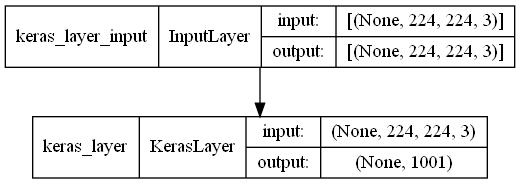

In [6]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='TFHUB_8th_notebook.jpg')

In [7]:
image = load_img('beetle.jpg', target_size=(224, 224))
image = img_to_array(image)
image = image / 255.0
image = np.expand_dims(image, axis=0)

predictions = model.predict(image)

In [8]:
predictions

array([[ 0.41324538,  1.0686674 ,  0.62547165, ..., -1.1538774 ,
        -0.6923067 , -0.31159365]], dtype=float32)

In [9]:
predictions.shape

(1, 1001)

Because of the background, it is 1001 not 1000

In [10]:
predicted_index = np.argmax(predictions[0], axis=-1)

In [11]:
predicted_index

512

We don't know what the 512th element of Imagenet is... So we need Imagenet classes.

In [12]:
file_name = 'ImageNetLabels.txt'
file_url = ('https://storage.googleapis.com/'
            'download.tensorflow.org/data/ImageNetLabels.txt')
labels_path = get_file(file_name, file_url)

In [13]:
with open(labels_path) as f:
    imagenet_labels = np.array(f.read().splitlines())

In [14]:
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

In [15]:
imagenet_labels.shape

(1001,)

In [16]:
predicted_class = imagenet_labels[predicted_index]
print(predicted_class)

convertible


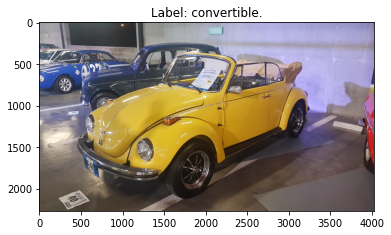

In [17]:
plt.figure()
plt.title(f'Label: {predicted_class}.')
original = load_img('beetle.jpg')
original = img_to_array(original)
plt.imshow(original / 255.0)
plt.show()